In [81]:
from causalimpact import CausalImpact

import numpy as np
import pandas as pd
import datetime
from datetime import datetime

from statsmodels.tsa.arima_process import ArmaProcess

import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import register_matplotlib_converters

In [83]:
from statsmodels.tsa.arima_model import ARIMA

In [84]:
import warnings
warnings.filterwarnings("ignore")

# **Data**

In [85]:
data = pd.read_csv("KOEPPEL FUNNEL.csv", parse_dates=['Date'])

In [86]:
print('Time period is: from ', data.Date.min().date(), ' to ', data.Date.max().date())

Time period is: from  2022-03-14  to  2022-10-30


In [87]:
#remove last row: totals
data = data.dropna(how='any', subset=['Date'], axis = 0)

Changing data types

In [88]:
data['tCVR'] = data['tCVR'].str.rstrip("%").astype(float)/100

data['CPT'] = data.CPT.str[1:].astype(str).astype(float)
data['CPI'] = data.CPI.str[1:].astype(str).astype(float)
data['Spend'] = data.Spend.str[1:].str.replace(',', '').astype(str).astype(float)
data['Rate'] = data.Rate.str[1:].astype(str).astype(float)

data['Frequency'] = data['Frequency'].astype(str).astype(int)

data['Trials'] = data['Trials'].astype(str).astype(int)

data['Installs'] = data['Installs'].str.replace(',', '').astype(str).astype(int)

In [89]:
data=data.sort_values(by=['Date'])
#reset indexes
data.reset_index(drop=True, inplace = True)

In [90]:
# Set pre-period
pre_period = [str(data.Date.min())[:10], str('2022-10-19')]
# Set post-period
post_period = [str('2022-10-20'), str(data.Date.max())[:10]]

In [91]:
model_data.loc[model_data.index >= '2022-10-20','Trials'].sum()

57

# **Causal Impact model**

In [92]:
model_data=data[['Date', 'Trials']]
model_data.set_index('Date', inplace=True)

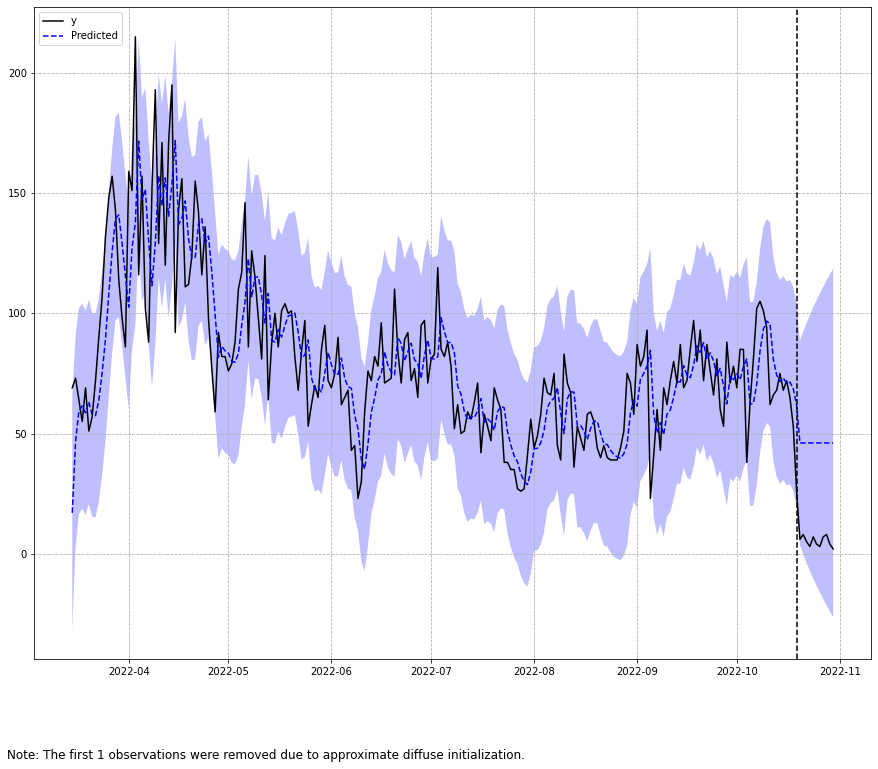

In [101]:
# Causal impact model, prior_level_sd default of 0.01
impact_15 = CausalImpact(data=model_data.Trials, pre_period=pre_period, post_period=post_period, prior_level_sd = None)
impact_15.plot(panels=['original'])

In [102]:
print(impact_15.summary('report'))
#downlift: -49.19
#trials predicted: 598.13

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 5.18. In the absence of an
intervention, we would have expected an average response of 46.08.
The 95% interval of this counterfactual prediction is [0.32, 89.15].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is -40.9 with a 95% interval of
[-83.96, 4.87]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 57.0.
Had the intervention not taken place, we would have expected
a sum of 506.86. The 95% interval of this prediction is [3.47, 980.61].


The above results are given in terms of absolute numbers. In relative
terms, the response variable showed a decrease of -88.75%.

In [103]:
sse = np.sum((impact_15.inferences.preds.loc[model_data.index < '2022-10-20'] - model_data.loc[model_data.index < '2022-10-20','Trials'])**2)
print(sse)

107125.65255394971


In [104]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print('MAE: ', mean_absolute_error( model_data.loc[model_data.index < '2022-10-20','Trials'], impact_15.inferences.preds.loc[model_data.index < '2022-10-20']))
print('MAPE: ',mean_absolute_percentage_error( model_data.loc[model_data.index < '2022-10-20','Trials'], impact_15.inferences.preds.loc[model_data.index < '2022-10-20']))
print('RMSE: ', mean_squared_error(model_data.loc[model_data.index < '2022-10-20','Trials'], impact_15.inferences.preds.loc[model_data.index < '2022-10-20'], squared=False))

MAE:  16.350629173446496
MAPE:  0.23992173445250944
RMSE:  22.06659883933487


In [105]:
impact_15.trained_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Unobserved Components Results                         
==============================================================================
Dep. Variable:                 Trials   No. Observations:                  220
Model:                    local level   Log Likelihood                -215.273
Date:                Wed, 14 Dec 2022   AIC                            434.545
Time:                        12:27:49   BIC                            441.323
Sample:                    03-14-2022   HQIC                           437.283
                         - 10-19-2022                                         
Covariance Type:                  opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     0.2345      0.022     10.634      0.000       0.191       0.278
sigma2.level         0.0802      0.017      4.706      0.000       0.047       0.114
===================================================================================
Ljung-Box (L1) (Q):                   0.87   Jarque-Bera (JB):                15.63
Prob(Q):                              0.35   Prob(JB):                         0.00
Heteroskedasticity (H):               0.31   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# **Causal Impact Spend**

In [106]:
model_data_spend=data[['Date', 'Spend']]
Causal.set_index('Date', inplace=True)

In [107]:
model_data_spend.loc[model_data.index >= '2022-10-20','Spend'].sum()

1103.0

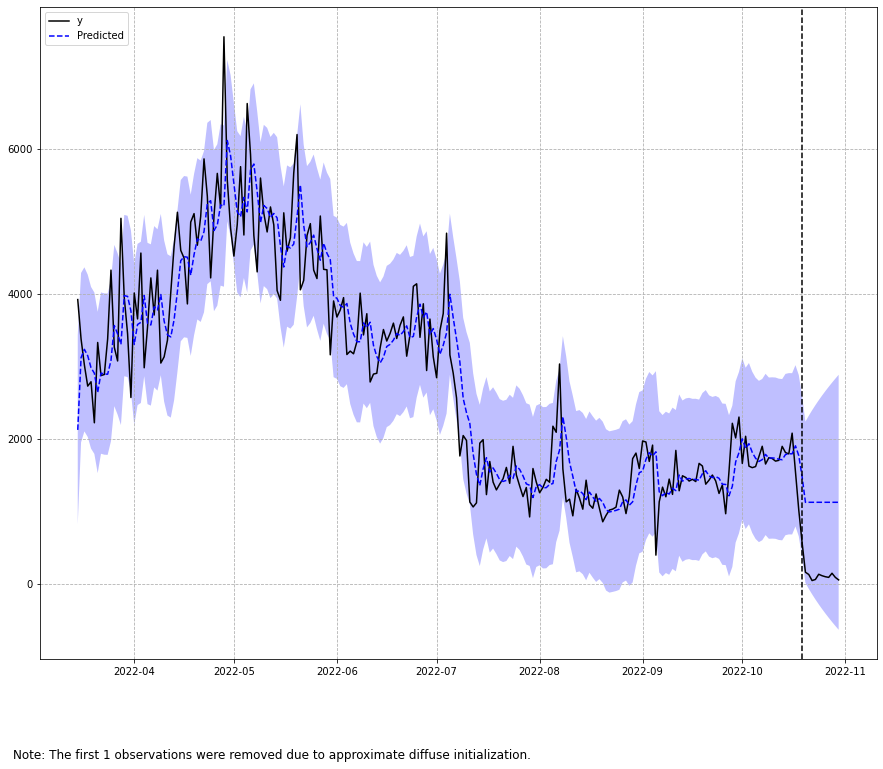

In [108]:
# Causal impact model, prior_level_sd default of 0.01
impact_spend = CausalImpact(data=model_data_spend.Spend, pre_period=pre_period, post_period=post_period, prior_level_sd = None)
impact_spend.plot(panels=['original'])

In [109]:
print(impact_spend.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 100.27. In the absence of an
intervention, we would have expected an average response of 1124.04.
The 95% interval of this counterfactual prediction is [3.53, 2191.75].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is -1023.77 with a 95% interval of
[-2091.48, 96.74]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 1103.0.
Had the intervention not taken place, we would have expected
a sum of 12364.47. The 95% interval of this prediction is [38.82, 24109.28].


The above results are given in terms of absolute numbers. In relative
terms, the response variable showed a d

# **ARIMA** time series analysis

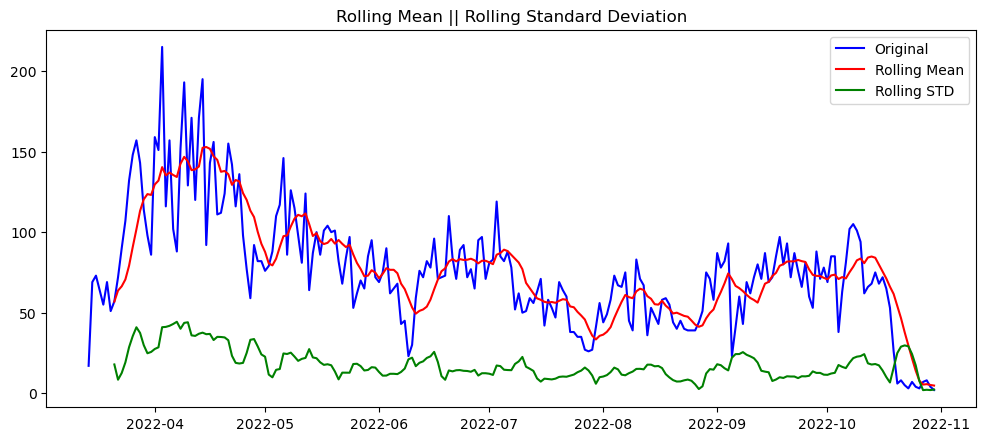

In [110]:
rolling_mean = model_data.rolling(window = 8).mean()
rolling_std = model_data.rolling(window = 8).std()

# ploting the data
plt.figure(figsize=(12,5), dpi=100)
plt.plot(model_data, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'green', label = 'Rolling STD')
plt.legend(loc = 'best')
plt.title('Rolling Mean || Rolling Standard Deviation')
plt.show()

In [111]:
result = adfuller(model_data['Trials'])
print('ADF Statistic: {}'.format(result[0]))
print('P-Values: {}'.format(result[1]))

print('Critical Values: ')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -1.6803319735368305
P-Values: 0.4412734588178363
Critical Values: 
	1%: -3.460154163751041
	5%: -2.874648939216792
	10%: -2.5737567259151044


Time series is non stationary!

In [112]:
#in one function:

In [113]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=8).mean()
    rolling_std = timeseries.rolling(window=8).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['Trials'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

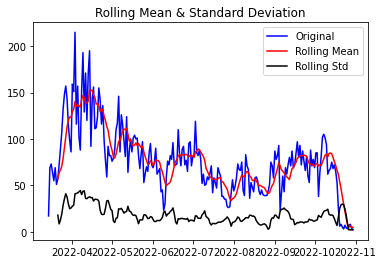

ADF Statistic: -1.6803319735368305
p-value: 0.4412734588178363
Critical Values:
	1%: -3.460154163751041
	5%: -2.874648939216792
	10%: -2.5737567259151044


In [114]:
get_stationarity(model_data)

In [115]:
result = adfuller(model_data['Trials'].diff().dropna())
print('ADF Statistic: {}'.format(result[0]))
print('P-Values: {}'.format(result[1]))

print('Critical Values: ')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -6.185648392816719
P-Values: 6.299035106685484e-08
Critical Values: 
	1%: -3.460154163751041
	5%: -2.874648939216792
	10%: -2.5737567259151044


**Finding model parameters:**

Time series from 1st degree differencing is stationary!

In [116]:
from pmdarima.arima.utils import ndiffs

ndiffs(model_data['Trials'], test='adf')  #1

1

In [117]:
ndiffs(model_data['Trials'], test='kpss')  #1

1

**d=1**

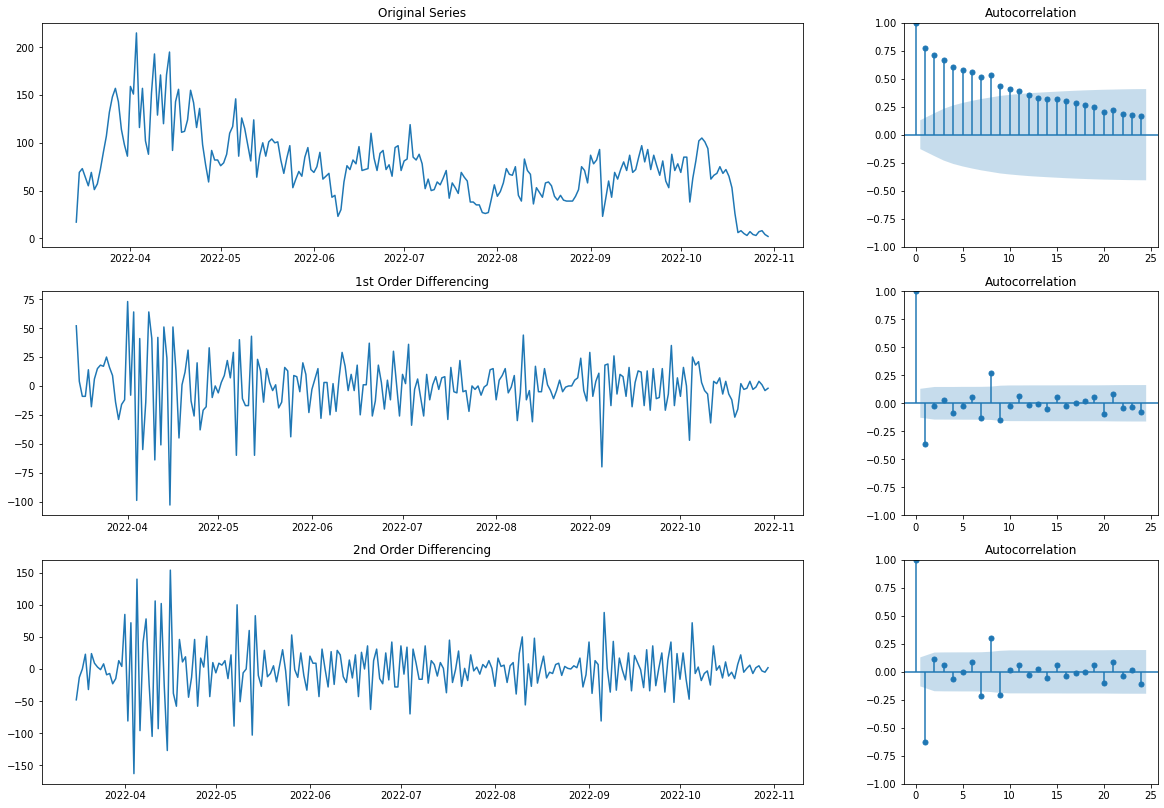

In [118]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(3, 2,gridspec_kw={'width_ratios': [3, 1]}, figsize=(20, 14))
axes[0, 0].plot(model_data['Trials']); axes[0, 0].set_title('Original Series')
plot_acf(model_data['Trials'], ax=axes[0, 1])
# 1st Differencing
axes[1, 0].plot(model_data['Trials'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(model_data['Trials'].diff().dropna(), ax=axes[1, 1])
# 2nd Differencing
axes[2, 0].plot(model_data['Trials'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(model_data['Trials'].diff().diff().dropna(), ax=axes[2, 1])
plt.show()

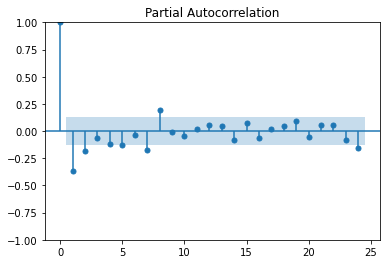

In [119]:
plot_pacf(model_data['Trials'].diff().dropna())
plt.show()

**max(p)=3** (can be set to 2 or 1)

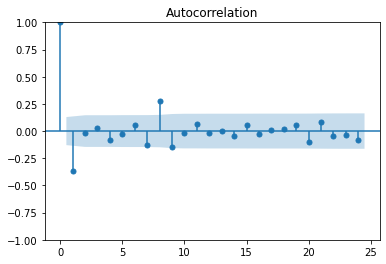

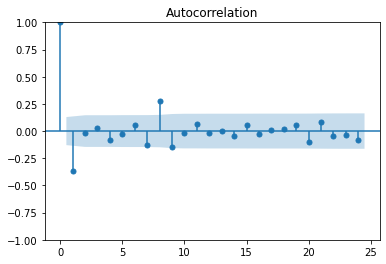

In [120]:
plot_acf(model_data['Trials'].diff().dropna()) 

**max(q)=2** (can be set to 1)

In [121]:
from  statsmodels.tsa.arima.model import ARIMA
# ARIMA order (p,d,q)
model = ARIMA(model_data['Trials'], order=(3,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 Trials   No. Observations:                  231
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1029.037
Date:                Wed, 14 Dec 2022   AIC                           2070.073
Time:                        12:38:37   BIC                           2090.702
Sample:                    03-14-2022   HQIC                          2078.394
                         - 10-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1021      1.197     -0.085      0.932      -2.448       2.243
ar.L2          0.1905      0.295      0.645      0.519      -0.389       0.770
ar.L3          0.0781      0.085      0.916      0.3

Train and test for pre and post period:

In [122]:
model_data.shape

(231, 1)

In [123]:
train =  model_data.loc[model_data.index <= '2022-10-19', 'Trials']

In [124]:
train.shape

(220,)

In [125]:
test = model_data.loc[model_data.index > '2022-10-19', 'Trials']

In [126]:
test.shape

(11,)

Auto-ARIMA

In [127]:
from pmdarima.arima import auto_arima

auto_model = auto_arima(train, start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,             
                      d=1,          
                      seasonal=False,   
                      start_P=0, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2020.453, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1974.422, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1974.378, Time=0.07 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1975.502, Time=0.10 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1975.869, Time=0.14 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=1977.862, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1988.945, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1973.794, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1975.125, Time=0.11 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1976.874, Time=0.18 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1977.866, Time=0.21 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1982.200, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1975.014, Time=0.10 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1976.993, Time=0.17 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1978.831, Time=0.23 sec
 ARIMA(3,1

In [128]:
prediction, confint = auto_model.predict(n_periods=11, return_conf_int=True)

prediction

2022-10-20    46.234193
2022-10-21    50.412263
2022-10-22    51.276865
2022-10-23    51.457672
2022-10-24    51.497366
2022-10-25    51.507939
2022-10-26    51.512502
2022-10-27    51.515824
2022-10-28    51.518891
2022-10-29    51.521905
2022-10-30    51.524908
Freq: D, dtype: float64

In [129]:
cf= pd.DataFrame(confint)

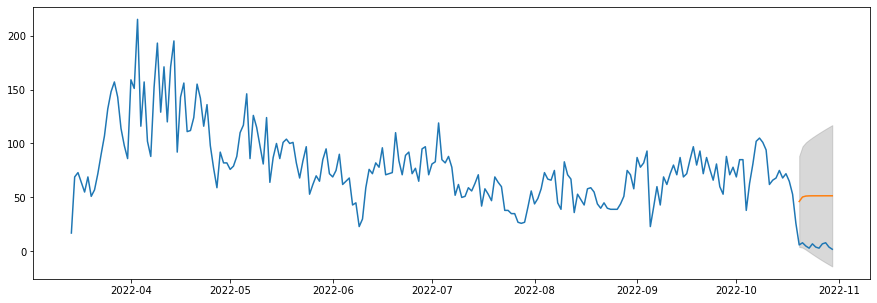

In [130]:
prediction_series = pd.Series(prediction,index=test.index)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(model_data)
ax.plot(prediction_series)
ax.fill_between(prediction_series.index,
                cf[0],
                cf[1],color='grey',alpha=.3)

# ARIMA model

In [131]:
import numpy as np
model = ARIMA(train, order=(3,1,2))  
fitted = model.fit()

In [132]:
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                 Trials   No. Observations:                  220
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -982.344
Date:                Wed, 14 Dec 2022   AIC                           1976.688
Time:                        12:38:48   BIC                           1997.022
Sample:                    03-14-2022   HQIC                          1984.900
                         - 10-19-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0932      1.261     -0.074      0.941      -2.564       2.378
ar.L2          0.1923      0.333      0.578      0.564      -0.460       0.845
ar.L3          0.0763      0.091      0.835      0.4

In [133]:
# Forecast
fc = fitted.forecast(11, alpha=0.05)

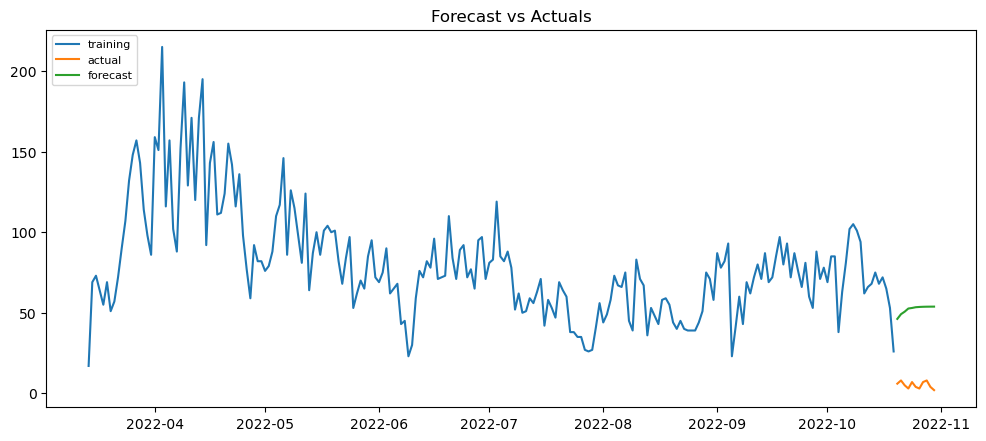

In [134]:
fc_series = pd.Series(fc, index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

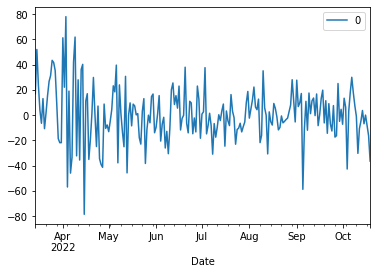

In [135]:
residuals = pd.DataFrame(fitted.resid)
residuals.plot()
plt.show()

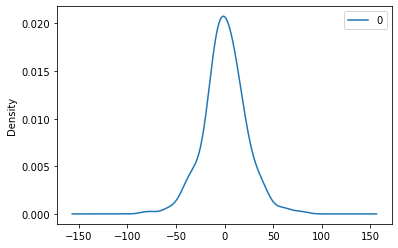

In [136]:
residuals.plot(kind='kde')
plt.show()

In [137]:
print(residuals.describe())

                0
count  220.000000
mean     0.392276
std     21.544322
min    -78.549701
25%    -11.115647
50%      0.251988
75%     12.646478
max     78.004870


# **Causal Impact and ARIMA comparison**

Predicted Price pct change


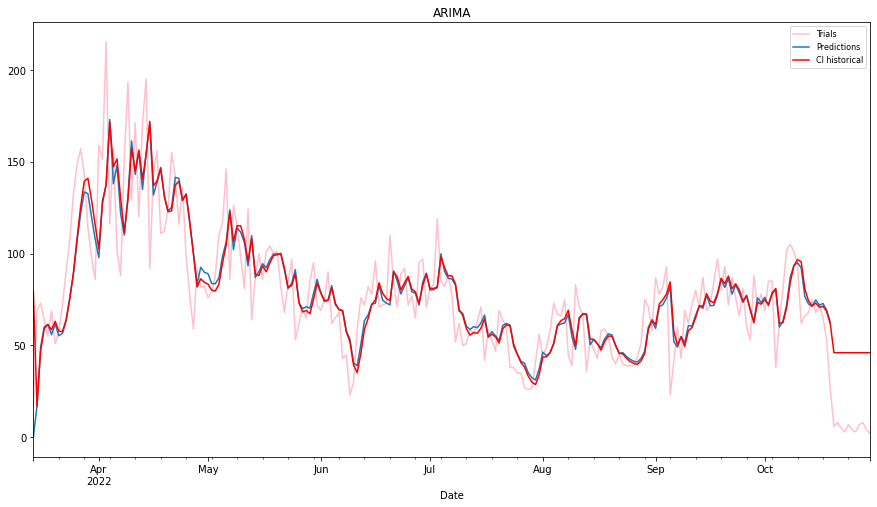

In [138]:
print("Predicted Price pct change")
def plotARMA(df_accumulative,ax, model):
    result=df_accumulative
    mod = model
    res = mod.fit()
    # Plot the original series and the forecasted series
    #res.plot_predict(start=0, end=400)
    df_accumulative.plot(ax=ax,label='Trials', color = 'pink')
    res.predict().plot(ax=ax,label='Predictions')
    plt.plot(impact_15.inferences.preds, color = 'red', label = 'CI historical')

fig,ax = plt.subplots(figsize=(15,8))    
plotARMA(model_data['Trials'],ax, model)
plt.legend(fontsize=8)
plt.title("ARIMA")
plt.show()

ARIMA predictions track Causal Impact model historical estimations

# Predictions if TV spend remains off

Trained on the entire dataset:

In [139]:
# ARIMA order (p,d,q)
model_future = ARIMA(model_data['Trials'], order=(3,1,2))
model_fit_future = model_future.fit()
print(model_fit_future.summary())

                               SARIMAX Results                                
Dep. Variable:                 Trials   No. Observations:                  231
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1029.037
Date:                Wed, 14 Dec 2022   AIC                           2070.073
Time:                        12:39:09   BIC                           2090.702
Sample:                    03-14-2022   HQIC                          2078.394
                         - 10-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1021      1.197     -0.085      0.932      -2.448       2.243
ar.L2          0.1905      0.295      0.645      0.519      -0.389       0.770
ar.L3          0.0781      0.085      0.916      0.3

In [140]:
fc = model_fit_future.forecast(62, alpha=0.05)

In [141]:
from datetime import date, timedelta

sdate = date(2022,10,31) 
edate = date(2023,1,1) 
forecast_index = pd.date_range(sdate,edate-timedelta(days=1),freq='d')

In [142]:
len(forecast_index)

62

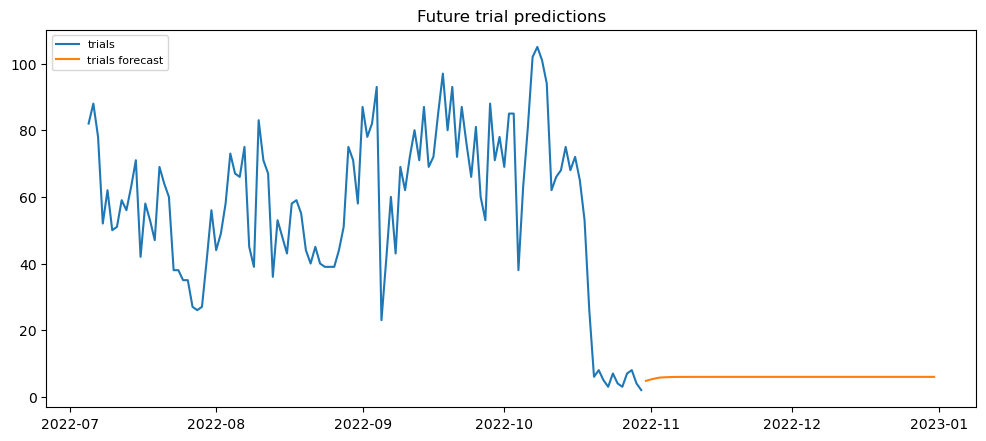

In [143]:
fc_series = pd.Series(fc,forecast_index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(model_data.loc[model_data.index > '2022-07-04','Trials'], label='trials')
plt.plot(fc_series, label='trials forecast')
plt.title('Future trial predictions')
plt.legend(loc='upper left', fontsize=8)
plt.show()

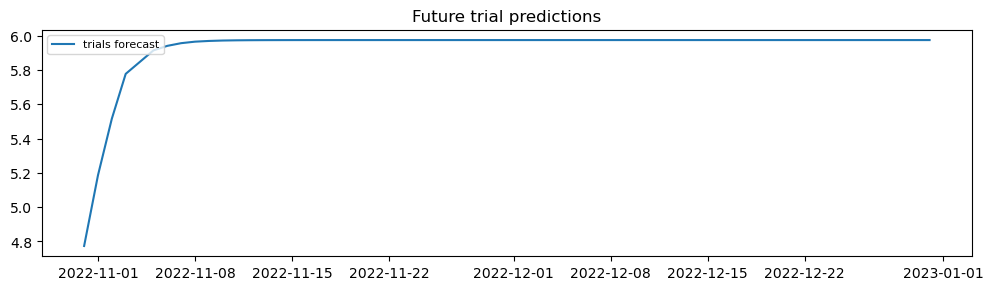

In [153]:
fc_series = pd.Series(fc,forecast_index)

# Plot
plt.figure(figsize=(12,3), dpi=100)
#plt.plot(model_data.loc[model_data.index > '2022-07-04','Trials'], label='trials')
plt.plot(fc_series, label='trials forecast')
plt.title('Future trial predictions')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [154]:
fc.groupby([lambda x: x.year, lambda x: x.month]).sum()

2022  10      4.773774
      11    177.539966
      12    185.220070
Name: predicted_mean, dtype: float64

Predicted trials for November: 177\
Predicted trials for December: 185

In [155]:
model_data.groupby([lambda x: x.year, lambda x: x.month]).sum()

Trials
Date Date        
2022 3       1602
     4       3896
     5       2822
     6       2172
     7       1796
     8       1674
     9       2176
     10      1435

# Trained only on post period data

In [156]:
# ARIMA order (p,d,q)
model_future_try = ARIMA(model_data.loc[model_data.index >= '2022-10-20','Trials'], order=(3,1,2))
model_fit_future_try = model_future_try.fit()
print(model_fit_future_try.summary())

                               SARIMAX Results                                
Dep. Variable:                 Trials   No. Observations:                   11
Model:                 ARIMA(3, 1, 2)   Log Likelihood                 -19.629
Date:                Wed, 14 Dec 2022   AIC                             51.259
Time:                        12:40:06   BIC                             53.074
Sample:                    10-20-2022   HQIC                            49.267
                         - 10-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9372      3.251     -0.288      0.773      -7.309       5.434
ar.L2         -0.8443      1.279     -0.660      0.509      -3.351       1.662
ar.L3         -0.6173      2.702     -0.228      0.8

In [157]:
fc_try = model_fit_future_try.forecast(62, alpha=0.05)

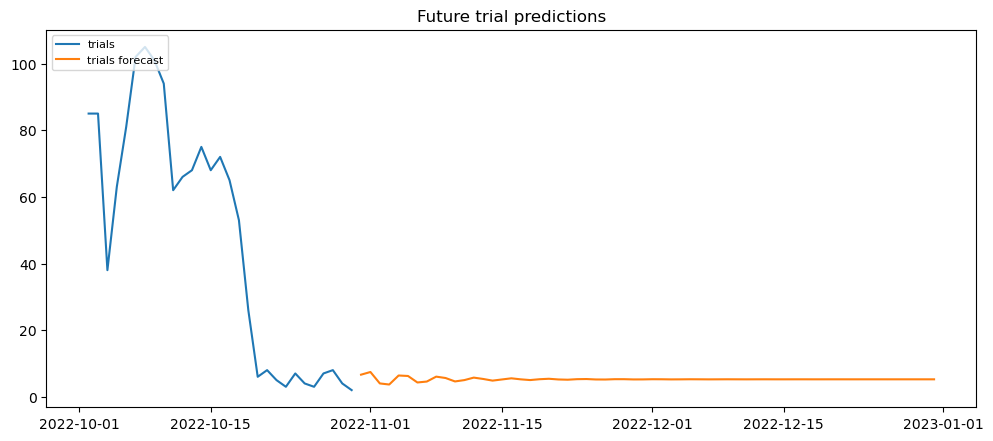

In [158]:
fc_series_try = pd.Series(fc_try,forecast_index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(model_data.loc[model_data.index > '2022-10-01','Trials'], label='trials')
plt.plot(fc_series_try, label='trials forecast')
plt.title('Future trial predictions')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Trained only on post period data:

In [159]:
fc_try.groupby([lambda x: x.year, lambda x: x.month]).sum()

2022  10      6.633762
      11    157.831462
      12    162.486929
Name: predicted_mean, dtype: float64

**Predicted trials for November: 158\
Predicted trials for December: 162**

When trained on all data:

In [160]:
fc.groupby([lambda x: x.year, lambda x: x.month]).sum()

2022  10      4.773774
      11    177.539966
      12    185.220070
Name: predicted_mean, dtype: float64

In [161]:
model_data.groupby([lambda x: x.year, lambda x: x.month]).sum()

Trials
Date Date        
2022 3       1602
     4       3896
     5       2822
     6       2172
     7       1796
     8       1674
     9       2176
     10      1435

In [162]:
model_data.loc[(model_data.index < '2022-10-01') & (model_data.index >= '2022-04-01')].groupby([lambda x: x.year, lambda x: x.month]).sum().mean()

Trials    2422.666667
dtype: float64

In [ ]:
#2423

In [163]:
np.average(model_data.loc[(model_data.index < '2022-10-01') & (model_data.index >= '2022-04-01')].groupby([lambda x: x.year, lambda x: x.month]).sum().values)

2422.6666666666665

In [164]:
model_data.loc[(model_data.index < '2022-10-01') & (model_data.index >= '2022-07-01')].groupby([lambda x: x.year, lambda x: x.month]).sum().mean()

Trials    1882.0
dtype: float64

In [ ]:
#1882 - last 3 months (maybe better)

Trying SARIMAX model - **not a significant difference**

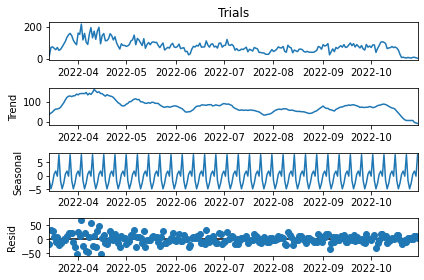

In [165]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(model_data['Trials'], model = 'additive', extrapolate_trend = 'freq')
result.plot()
plt.show()

In [230]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_sarima = SARIMAX(model_data['Trials'],order = (3,1,2), seasonal_order = (1,0,1,7))
results = model_sarima.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                              Trials   No. Observations:                  231
Model:             SARIMAX(3, 1, 2)x(1, 0, [1], 7)   Log Likelihood               -1028.865
Date:                             Wed, 14 Dec 2022   AIC                           2073.730
Time:                                     13:00:43   BIC                           2101.234
Sample:                                 03-14-2022   HQIC                          2084.824
                                      - 10-30-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1335      1.804     -0.074      0.941      -3.670       3.403
ar.L2          0.1733      0.406      0.427      0.670      -0.623       0.969
ar.L3          0.0638      0.091      0.703      0.482      -0.114       0.241
ma.L1         -0.3465      1.818     -0.191      0.849      -3.910       3.217
ma.L2         -0.2960      1.246     -0.238      0.812      -2.737       2.145
ar.S.L7        0.1887      1.602      0.118      0.906      -2.952       3.329
ma.S.L7       -0.2305      1.564     -0.147      0.883      -3.296       2.835
sigma2       448.9249     34.971     12.837      0.000     380.384     517.466
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                21.96
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.29   Skew:                            -0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [231]:
forecats_sarimax= results.predict(start=model_data.index.min(),end=model_data.index.max())

In [232]:
forecats_sarimax

2022-03-14     0.000000
2022-03-15    16.996558
2022-03-16    50.040307
2022-03-17    60.829311
2022-03-18    61.915963
                ...    
2022-10-26    10.386534
2022-10-27     8.605374
2022-10-28     8.512938
2022-10-29     9.112856
2022-10-30     6.939815
Freq: D, Name: predicted_mean, Length: 231, dtype: float64

In [233]:
print('MAE: ', mean_absolute_error( model_data.loc[model_data.index < '2022-10-20','Trials'], forecats_sarimax.loc[model_data.index < '2022-10-20']))
print('MAPE: ',mean_absolute_percentage_error( model_data.loc[model_data.index < '2022-10-20','Trials'], forecats_sarimax.loc[model_data.index < '2022-10-20']))
print('RMSE: ', mean_squared_error(model_data.loc[model_data.index < '2022-10-20','Trials'], forecats_sarimax.loc[model_data.index < '2022-10-20'], squared=False))

MAE:  15.960812457532082
MAPE:  0.22379934847191588
RMSE:  21.509042191686166


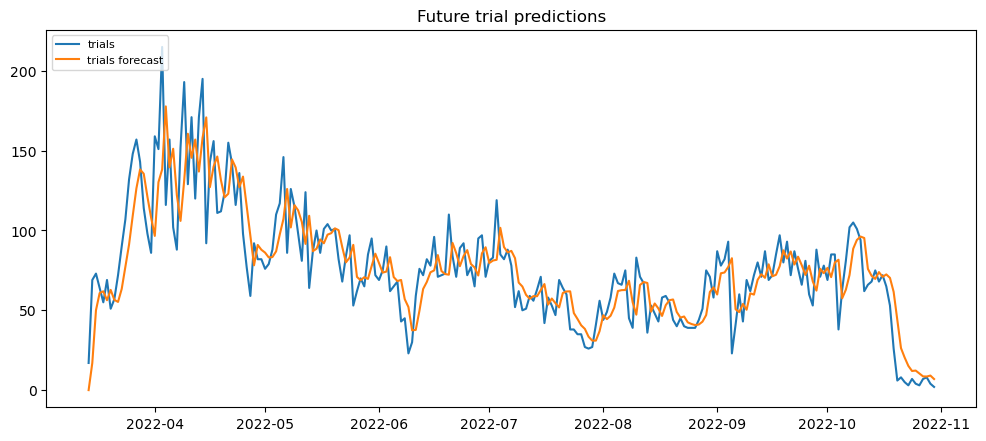

In [234]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(model_data['Trials'], label='trials')
plt.plot(forecats_sarimax, label='trials forecast')
plt.title('Future trial predictions')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [235]:
forecats_sarimax_future = results.predict(start='2022-10-31',end='2022-12-31')

In [236]:
forecats_sarimax_future.groupby([lambda x: x.year, lambda x: x.month]).sum()

2022  10      4.766455
      11    198.288752
      12    207.840919
Name: predicted_mean, dtype: float64

Trained only on post period

In [203]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_sarima = SARIMAX(model_data.loc[model_data.index >= '2022-10-20','Trials'],order = (3,1,2), seasonal_order = (1,0,1,7))
results = model_sarima.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                              Trials   No. Observations:                   11
Model:             SARIMAX(3, 1, 2)x(1, 0, [1], 7)   Log Likelihood                 -15.915
Date:                             Wed, 14 Dec 2022   AIC                             47.831
Time:                                     12:57:01   BIC                             50.251
Sample:                                 10-20-2022   HQIC                            45.175
                                      - 10-30-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1803     13.034     -0.014      0.989     -25.727      25.367
ar.L2         -0.1959     11.405     -0.017      0.986     -22.550      22.158
ar.L3         -0.9660      7.858     -0.123      0.902     -16.366      14.434
ma.L1         -0.0162    675.465  -2.39e-05      1.000   -1323.903    1323.870
ma.L2         -0.9836    672.818     -0.001      0.999   -1319.683    1317.716
ar.S.L7        0.9961      0.782      1.274      0.203      -0.536       2.528
ma.S.L7        0.7527    250.774      0.003      0.998    -490.755     492.261
sigma2         0.0161      3.376      0.005      0.996      -6.601       6.633
===================================================================================
Ljung-Box (L1) (Q):                   1.84   Jarque-Bera (JB):                 0.56
Prob(Q):                              0.17   Prob(JB):                         0.76
Heteroskedasticity (H):               1.12   Skew:                             0.27
Prob(H) (two-sided):                  0.93   Kurtosis:                         1.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.12e+16. Standard errors may be unstable.
"""

In [204]:
forecats_sarimax_future = results.predict(start='2022-10-31',end='2022-12-31')

In [205]:
forecats_sarimax_future.groupby([lambda x: x.year, lambda x: x.month]).sum()

2022  10      7.158686
      11    152.641369
      12    160.811522
Name: predicted_mean, dtype: float64